# The Great Wine Company Project

In [ ]:

import csv 
import pandas as pd
with open('winemag-data-130k-v2.csv', 'r') as fh:
    reader = csv.reader(fh, delimiter=',' )
    for row in reader:
        print(row)


In [17]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

#To read the CSV file
with open('winemag-data-130k-v2.csv', 'r') as fh:
    reader = csv.reader(fh, delimiter=',')
    header = next(reader)  # Read the header row
    data = [row for row in reader]

# I Converted the data into a pandas DataFrame
wine_data = pd.DataFrame(data, columns=header)

# Convert relevant columns to numeric types
wine_data['points'] = pd.to_numeric(wine_data['points'], errors='coerce')
wine_data['price'] = pd.to_numeric(wine_data['price'], errors='coerce')

# this is to Remove rows with missing values
wine_data = wine_data.dropna(subset=['points', 'price'])


1. Countries producing the finest quality wine (90+ points)


Top 5 Countries Producing High-Quality Wines (90+ points):
country
US           22262
France        7100
Italy         5864
Portugal      1766
Austria       1732
Spain         1583
Germany       1183
Australia      939
Argentina      768
Chile          646
Name: count, dtype: int64


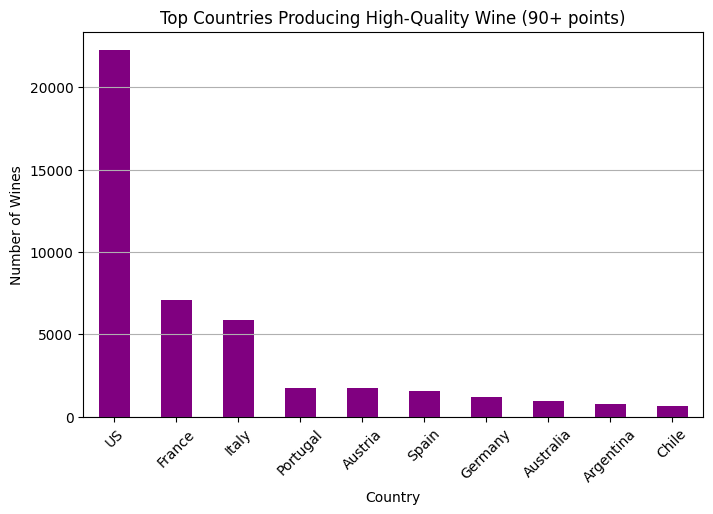

In [19]:
high_quality = wine_data[wine_data['points'] >= 90]
top_countries = high_quality['country'].value_counts().head(10)

print("\nTop 5 Countries Producing High-Quality Wines (90+ points):")
print(top_countries)

# Plot top countries producing high-quality wine
plt.figure(figsize=(8,5))
top_countries.plot(kind='bar', color='purple')
plt.title('Top Countries Producing High-Quality Wine (90+ points)')
plt.xlabel('Country')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


2. Most expensive product


Most Expensive Wine:
Wine: Château les Ormes Sorbet 2013  Médoc
Producer: Château les Ormes Sorbet
Price: £3300.0


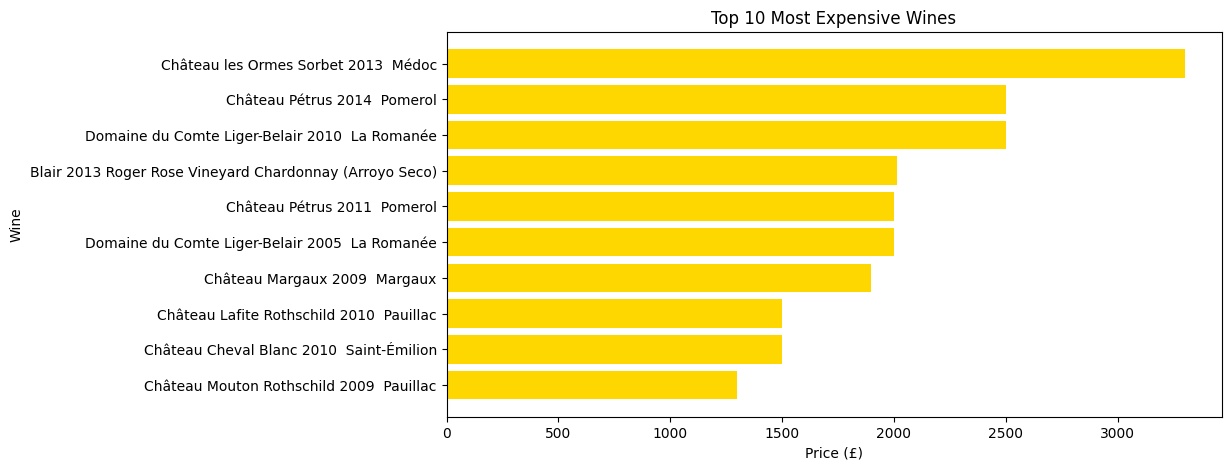

In [20]:
most_expensive = wine_data.loc[wine_data['price'].idxmax()]
print("\nMost Expensive Wine:")
print(f"Wine: {most_expensive['title']}")
print(f"Producer: {most_expensive['winery']}")
print(f"Price: £{most_expensive['price']}")

# Bar chart for top 10 expensive wines
top_expensive_wines = wine_data.nlargest(10, 'price')[['title', 'price']]
plt.figure(figsize=(10, 5))
plt.barh(top_expensive_wines['title'], top_expensive_wines['price'], color='gold')
plt.xlabel('Price (£)')
plt.ylabel('Wine')
plt.title('Top 10 Most Expensive Wines')
plt.gca().invert_yaxis()
plt.show()


3. Wines to be discontinued 

In [22]:
low_quality_wines = wine_data[wine_data['points'] < 45]

# Checking if there are any low-quality wines
if not low_quality_wines.empty:
    print("\nProducts to be discontinued (points < 45):")
    print(low_quality_wines[['title', 'winery', 'points']].head(10))

    
    plt.figure(figsize=(8,5))
    low_quality_wines['country'].value_counts().plot(kind='bar', color='red')
    plt.title('Low-Quality Wine Distribution (points < 45)')
    plt.xlabel('Country')
    plt.ylabel('Number of Wines')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("No low-quality wines found below 45).")



No low-quality wines found below 45).
